In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
T_0 = 1.17
n = 6
T = np.array([0, 1.5, 3])

In [10]:
T_int = 6 * T_0 + T
T_emk = 2.81 * T_0
T_a = 5.7 * T_0
tau = T_emk + T

In [13]:
# v1.0
PI_T_i = (0.153 * (tau / T_a) + 0.362) * T_a
PI_K = 1 / (1.905 * (tau / T_a) + 0.826)
a = 0.25
PID_T_i = (0.186 * (tau / T_a) + 0.532) * T_a
PID_K = 1 / (1.552 * (tau / T_a) + 0.078)
T_d = a * PID_T_i
T_c = T_d / 8
(PI_T_i, PI_K), (PID_T_i, PID_K, T_d, T_c)

((array([2.9171961, 3.1466961, 3.3761961]),
  array([0.56653   , 0.45587025, 0.38137638])),
 (array([4.1594202, 4.4384202, 4.7174202]),
  array([1.18608658, 0.83879487, 0.64881794]),
  array([1.03985505, 1.10960505, 1.17935505]),
  array([0.12998188, 0.13870063, 0.14741938])))

In [16]:
# v2.0
PI_T_i = (-0.467 * (tau / T_int) + 0.624) * T_int
PI_K = 1 / (4.345 * (tau / T_int) - 0.151)
a = 0.4
PID_T_i = (-0.150 * (tau / T_int) + 0.552) * T_int
PID_K = 1 / (2.766 * (tau / T_int) - 0.521)
T_d = a * PID_T_i
T_c = T_d / 8
(PI_T_i, PI_K), (PID_T_i, PID_K, T_d, T_c)

((array([2.8451241, 3.0806241, 3.3161241]),
  array([0.53081139, 0.43656405, 0.3882662 ])),
 (array([3.381885, 3.984885, 4.587885]),
  array([1.29130564, 0.96775752, 0.8232442 ]),
  array([1.352754, 1.593954, 1.835154]),
  array([0.16909425, 0.19924425, 0.22939425])))

In [19]:
T_0 = 1.17
n = 6
T = 3
Kkr = 0.745
Tkr = 19.5

In [17]:
import sympy
sympy.init_printing()

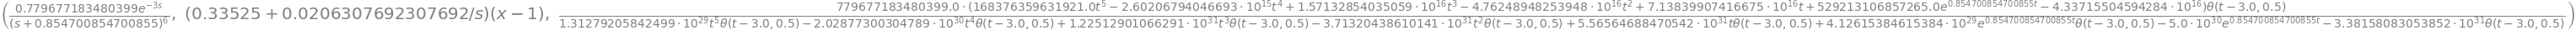

In [122]:
K = Kkr * 0.45
T_i = Tkr / 1.2
t, s, x = sympy.symbols("t s x")
e = (x - 1)
v = K * (1 + 1/(s * T_i)) * e
# v = K * (e + 1/T_i * sympy.Integral(e, (t, 0, t)))
W = 2 * sympy.exp(-s * T) / (1 + s * T_0) ** n
# Wt = sympy.inverse_laplace_transform(W, s, t)
inv = sympy.inverse_laplace_transform(W * v, s, t)
x = sympy.solve(sympy.Eq(x, inv), x)[0]
# f = sympy.solve(sympy.Eq(x, Wt * v), x)[0]
# f = f.evalf(subs={x: f})
W, v, x

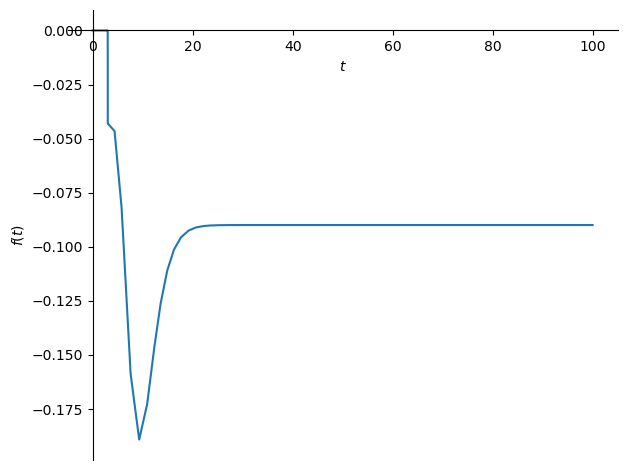

In [126]:
sympy.plot(x, (t, 0, 100))

In [127]:
epsilon = sympy.integrate(sympy.Abs(x - 1), (t, 0, 100))
epsilon.evalf()

In [130]:
sympy.inverse_laplace_transform(1/(T_i * s), s, t), 1 / T_i